In [1]:
import numpy as np
from scipy import stats
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [2]:
genos = np.loadtxt("data/ps1.genos")
phenos = np.loadtxt("data/ps1.phenos")

In [3]:
genos.shape

(250, 10)

In [4]:
phenos.shape

(250,)

In [5]:
genos

array([[2., 0., 2., ..., 0., 2., 2.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 1.],
       ...,
       [2., 0., 2., ..., 0., 2., 2.],
       [2., 0., 2., ..., 0., 2., 2.],
       [2., 0., 2., ..., 0., 2., 2.]])

In [6]:
phenos

array([-0.182277  , -0.13827608, -0.06136348,  0.83627189, -0.15180973,
        0.30816298, -0.25626492,  0.94868842, -0.48257301, -0.3225064 ,
        0.36806944,  0.10147987, -0.44795838,  0.6996848 , -0.14585318,
       -0.28778675, -0.34945503,  0.75936789, -0.56488608,  2.15944908,
       -0.66774805,  0.44967017,  0.25548843,  0.73088316, -1.01751483,
       -0.12302799, -0.38493863,  0.22665785, -1.06413685, -0.03087531,
       -0.34522791,  1.64549998,  0.15631105, -0.09136492, -0.62938814,
       -0.19417007,  0.18200683,  0.39989989,  1.27482734,  0.6412819 ,
       -0.08247479,  1.58881893, -1.91207778,  0.86348404, -0.47347952,
        1.24102605, -0.32583238,  0.96555632,  0.32521217, -2.00677711,
       -0.13103262, -1.87659101,  0.17824895,  1.77571595, -2.09979988,
        0.92334832, -1.28823958,  1.98076695,  1.29593049, -0.76773503,
       -0.23153805, -0.05200041, -0.61271473,  2.13943574, -0.13985349,
       -0.65077691,  0.60501707, -0.07306084,  0.21952991, -0.07

In [7]:
first_SNP = genos[:,0]

In [8]:
first_SNP

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 1., 2., 1., 0., 1., 0., 0., 1.,
       2., 2., 1., 0., 0., 1., 1., 0., 2., 2., 1., 1., 0., 0., 1., 2., 1.,
       1., 1., 1., 1., 2., 0., 1., 2., 0., 2., 1., 1., 1., 0., 2., 0., 2.,
       0., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       2., 1., 0., 1., 2., 1., 0., 2., 1., 2., 2., 1., 0., 1., 2., 2., 0.,
       2., 0., 1., 0., 1., 1., 0., 0., 1., 2., 0., 1., 0., 2., 2., 1., 1.,
       1., 1., 1., 0., 0., 2., 1., 1., 1., 0., 0., 0., 0., 1., 1., 2., 1.,
       1., 1., 2., 0., 2., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 2., 1.,
       1., 0., 1., 0., 0., 2., 1., 0., 0., 0., 1., 2., 0., 2., 1., 2., 1.,
       2., 2., 1., 0., 2., 0., 1., 0., 0., 1., 1., 2., 1., 1., 0., 1., 1.,
       2., 1., 1., 1., 1., 0., 0., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 0., 2., 2., 1., 2., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 2., 2., 1., 1., 0., 0., 1., 2., 1., 1., 1., 1., 1., 0., 2.,
       1., 1., 1., 2., 0.

In [9]:
test_statistic_list = []
N_permutations = 100000
N_individuals = first_SNP.shape[0]
for i in range(N_permutations):
    chosen_index1 = np.random.choice(N_individuals,int(N_individuals/2),replace = False)
    chosen_index2 = np.random.choice(N_individuals,int(N_individuals/2),replace = False)
    chosen_pheno = phenos[chosen_index1]
    chosen_SNP = first_SNP[chosen_index2] 
    p_2 = (stats.pearsonr(chosen_pheno,chosen_SNP).statistic)**2
    test_statistic_list.append((N_individuals/2) * p_2)
test_statistic_array = np.array(test_statistic_list)

In [10]:
pearson_result = stats.pearsonr(phenos,first_SNP)

observed_test_statistic, observed_p_value = N_individuals * (pearson_result.statistic**2), pearson_result.pvalue


In [11]:
observed_p_value

0.007477481395880756

In [12]:
observed_test_statistic

7.123297230470764

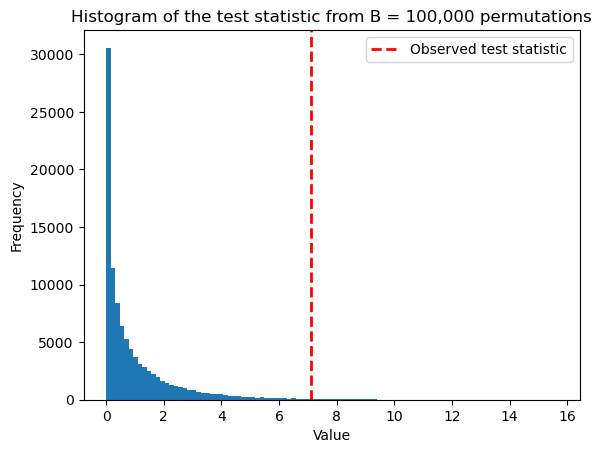

In [13]:
num_bins = 100

plt.hist(test_statistic_array, num_bins, density=False)
plt.axvline(observed_test_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed test statistic')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the test statistic from B = 100,000 permutations')

plt.legend()
plt.show()

In [14]:
observed_test_statistic

7.123297230470764

In [15]:
p_value_estimated = np.where(test_statistic_array >= observed_test_statistic)[0].shape[0]/N_permutations

In [16]:
print(f'Estimated p value is {p_value_estimated:.4f}')
print(f'Reject Null since {p_value_estimated:.4f} < 0.05')

Estimated p value is 0.0074
Reject Null since 0.0074 < 0.05


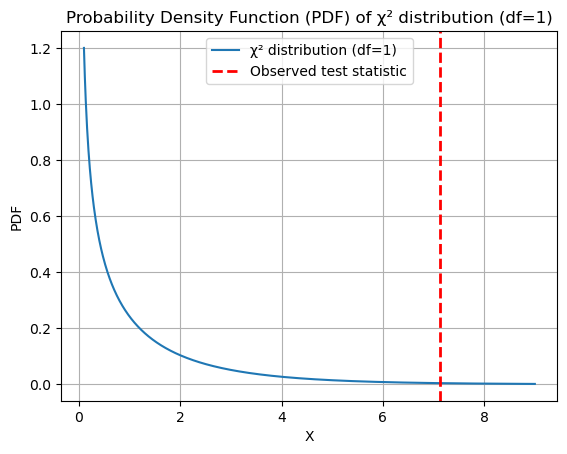

In [17]:
df = 1
x = np.linspace(0.1, 9, 1000)
pdf = chi2.pdf(x, df)

plt.plot(x, pdf, label=f'χ² distribution (df={df})')
plt.axvline(observed_test_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed test statistic')
plt.xlabel('X')
plt.ylabel('PDF')
plt.title(f'Probability Density Function (PDF) of χ² distribution (df={df})')
plt.legend()
plt.grid(True)

plt.show()

In [18]:
p_value_asympthotic = 1 - chi2.cdf(observed_test_statistic, df)

print(f'P(x >= {observed_test_statistic}) = {p_value_asympthotic:.4f}')
print(f'Reject Null since {p_value_asympthotic:.4f} < 0.05')

P(x >= 7.123297230470764) = 0.0076
Reject Null since 0.0076 < 0.05


In [19]:
#FWER

In [25]:
test_statistic_list = []
p_value_list = []
for i in range(10):
    SNP = genos[:,i]
    pearson_result = stats.pearsonr(phenos,SNP)
    observed_test_statistic_2, observed_p_value = N_individuals * (pearson_result.statistic**2), pearson_result.pvalue
    test_statistic_list.append(observed_test_statistic_2)
    p_value_asympthotic = 1 - chi2.cdf(observed_test_statistic_2, df)
    p_value_list.append(p_value_asympthotic)

In [26]:
p_value_list

[0.007608864352767197,
 0.5529325726684817,
 0.08041859379978811,
 0.03076361349340162,
 0.004045787087248787,
 0.007608864352767197,
 0.5569051171445523,
 0.00893560663839088,
 0.005661036886680071,
 0.04924810580014638]

In [28]:
test_statistic_list

[7.123297230470764,
 0.3520897106556389,
 3.0564215614821584,
 4.66610544333577,
 8.263149848266774,
 7.123297230470764,
 0.34509121100900975,
 6.835652112203338,
 7.655153677861439,
 3.866876082210885]

In [22]:
alpha = 0.05

In [23]:
rejected = np.array(p_value_list) < (alpha/len(p_value_list))

In [24]:
rejected

array([False, False, False, False,  True, False, False, False, False,
       False])